In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
# import dataProc
# from dataProc import *
# importing data for validation and testing
dataset=df.values

In [6]:
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
x=dataset[:,0:10]

In [8]:
y=dataset[:,10]

In [11]:
from sklearn import preprocessing

In [10]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=a79405b1270a810d94401f73518ac32804c9f82283681f219f47832ab0b261da
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [12]:
min_max_scaler=preprocessing.MinMaxScaler()
x_scale=min_max_scaler.fit_transform(x) 
# scaling data

In [13]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
# split train and test
# split data into kfolds
# StratifiedKFold is a variation of KFold.It shuffles data, after that splits the data into n_splits parts.It will use each part as a test set.It only and always shuffles data one time before splitting.
# The F1 score can be interpreted as a weighted average of the precision and recall(precision is fraction of relevant data among retrieved data.Recall is fraction of retrieved data among all relevant data)

In [15]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3)
# validation and test size 30% of overall test

In [16]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)
# split validation and test


In [39]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [74]:
# input has 10 features, training has 1022 datapoints, validation and test has 219 datapoints only 1 feature to be predicted
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
# Adam  is sgd optimizer
# categorical crossentropy Computes the crossentropy metric between the labels and predictions.

In [71]:
# targetLabels = tf.to_categorical(dataProc.gyrData[''])  (target-final output to be predicted, label-true outcome of target, categorical-binary)
#     xData = dataProc.gyrData.shape[1]
#     gyr_input_data = dataProc.gyrData.values
#     model = Sequential() 
#     model.add(Dense(units=128, input_shape = (xData,)))
#     model.add(Activation('relu'))
#     model.add(Dense(units=1, input_shape = (xData,)))
#     model.add(Activation('softmax'))
    
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#     model.fit(gyr_input_data, y_train, batch_size=32, epochs=10)
#     score = model.evaluate(gyr_input_data, y_test, batch_size=32)
# predicts the output for the given input and then computes the metrics function specified in the model.compile and based on y_true and y_pred and returns the computed metric value as the output

#     model.predict(gyr_input_data)

#     print(\"\\nLoss: \", score[0])
#     print(\"Accuracy: \", score[1])
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
# model will be described sequentially(layer by layer). 1st hidden layer has 32 neurons and inputshape 10(10 input features).Sigmoid activation has to be changed to softmax

In [72]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']) 
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Adam optimizer
# apart from loss, accuracy also to be calculated

In [73]:
# def dnn_kfold(i,maa,ld):
#     F=[2,5,10]
#     skf = StratifiedKFold(n_splits=F[i], shuffle=True, random_state=1)
#     skf.get_n_splits(maa,ld)
#     print(skf)
#     hist=[]
#     lossscores=[] #stores the validation loss value an the end of Epoch\n",
#     cvscores = [] #stores the validation Acc value an the end of Epoch\n",
#     f1scores = [] \n",
#     confusionscores=[] #stores the confusion matrix \n",
#     iteration = 1

#     for train,test in skf.split(maa,ld):
#     print(\"TRAIN:\", train, \"TEST:\", test)
#     X_train, X_test = maa[train], maa[test]
#     Y_train, Y_test = ld[train], ld[test]

#     model=dnn_model(X_train)
#     print(f'Training for fold {iteration} ...')
#     # train the neural network for 10 training epochs\n",
#     history=model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=training_epochs, batch_size=batch_size, verbose=1)\n",
#     hist.append(history)\n",
#    scores = model.evaluate(X_test, Y_test, verbose=0)   \n",
# cvscores.append(scores[1] * 100)    #validation_Accuracy imported\n",
#     lossscores.append(scores[0])        #validation_loss imported
#     #calculate F1 score
#     Y_pred = np.round(model.predict(X_test,batch_size=50, verbose=2)[:,1]).astype(int)
#      #returns an array of labels of X_test data
#     conf=tf.math.confusion_matrix(Y_test,Y_pred)
#     f1 = f1_score(Y_test,Y_pred, average='macro')
#     confusionscores.append(conf)
#             f1scores.append(f1)
            
#             iteration = iteration + 1
            
#         print(\"Val Accuracy: %.2f%% (+/- %.2f%%)\" % (np.mean(cvscores), np.std(cvscores)))
#         print(\"F1: %.2f%% (+/- %.2f%%)\" % (np.mean(f1scores), np.std(f1scores)))
#         return hist,cvscores,lossscores,f1scores,confusionscores
# def data_return(maa,ld):
#         split_no=[2,5,10]
#         fin_hist=[]
#         fin_cvs=[]
#         fin_losss=[]
#         fin_f1s=[]
#         fin_cs=[]
#         for i in range(np.shape(split_no)[0]):
        
#             a,b,c,d,e=dnn_kfold(i,maa,ld)
#             fin_hist.append(a)
#             fin_cvs.append(b)
#             fin_losss.append(c)
#             fin_f1s.append(d)
#             fin_cs.append(e)
            
#         return fin_hist,fin_cvs,fin_losss,fin_f1s,fin_cs
hist = model.fit(x_train, y_train,
          batch_size=10, epochs=30,
          validation_data=(x_val, y_val))
# training the model
# fitting parameters to the data
# epochs-how long the model has to be trained
# specify validation data


Epoch 1/30
103/103 [==============================] - 3s 26ms/step - loss: 0.6554 - accuracy: 0.5284 - val_loss: 0.6497 - val_accuracy: 0.5251
Epoch 2/30
103/103 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6438 - val_loss: 0.6282 - val_accuracy: 0.6530
Epoch 3/30
103/103 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.7397 - val_loss: 0.6062 - val_accuracy: 0.7626
Epoch 4/30
103/103 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7984 - val_loss: 0.5823 - val_accuracy: 0.8356
Epoch 5/30
103/103 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.8523 - val_loss: 0.5546 - val_accuracy: 0.7945
Epoch 6/30
103/103 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.8523 - val_loss: 0.5265 - val_accuracy: 0.8265
Epoch 7/30
103/103 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.8718 - val_loss: 0.4994 - val_accuracy: 0.8402
Epoch

In [44]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8767


0.8767123222351074

In [47]:
import matplotlib.pyplot as plt

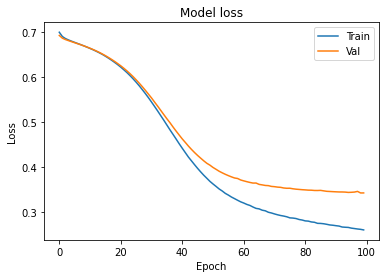

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
# visualising training loss and validation loss

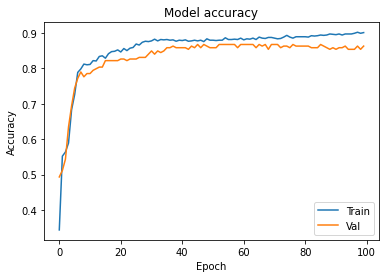

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# visualising training and validation accuracy